In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

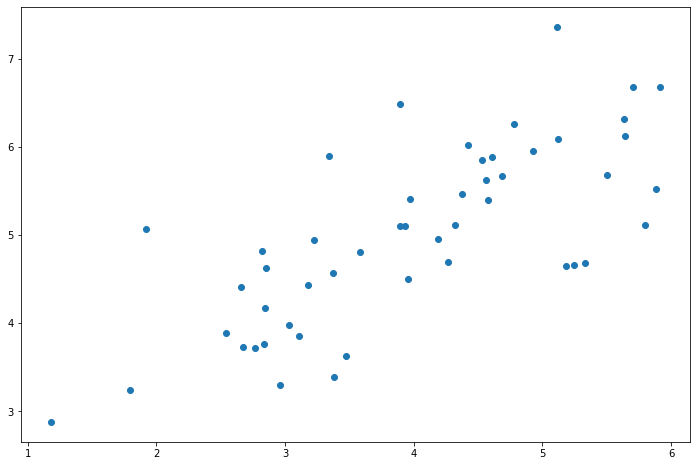

In [7]:
mat = sio.loadmat('data/ex7data1.mat')
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
X = mat['X']
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X1'], data['X2'])
plt.show()

In [53]:
X.shape
X
data.describe()

,X1,X2
count,50.000000,50.000000
mean,3.989265,5.002806
std,1.173050,1.023408
min,1.180233,2.878694
25%,3.051136,4.418211
50%,3.963505,5.012886
75%,4.891286,5.810504
max,5.911298,7.363197


In [17]:
def pca(X):
    X = (X - X.mean()) - X.std()

    X = np.matrix(X)
    sigma = (1 / X.shape[0]) * (X.T * X) #(50, 50)

    U, S, V = np.linalg.svd(sigma)

    return U, S, V

In [18]:
U, S, V = pca(X)
U, S, V

(matrix([[-0.88251182, -0.47029021],
         [-0.47029021,  0.88251182]]),
 array([5.36163328, 0.41551399]),
 matrix([[-0.88251182, -0.47029021],
         [-0.47029021,  0.88251182]]))

In [29]:
def projectData(X, U, k):
    
    U_reduce = U[:, :k] #(n, k)
    
    return X * U_reduce #(m, n) * (n, k)

In [48]:
z = projectData(X, U, 1) #(50, 1)
z.shape

(50, 1)

In [42]:
def reconstruction(U, z):

    k = z.shape[1]
    U_reduce = U[:, :k]
    X_approx = U_reduce * z.T
    
    return X_approx.T

In [44]:
X_approx = reconstruction(U, z)
X_approx

matrix([[4.04025875, 2.15305234],
        [5.95613072, 3.17401978],
        [3.89945666, 2.07801896],
        [3.69567266, 1.96942255],
        [3.9499665 , 2.10493563],
        [5.72307682, 3.04982544],
        [4.21481683, 2.24607427],
        [7.37664346, 3.93101047],
        [5.17597147, 2.75827321],
        [5.88675651, 3.13705028],
        [5.80263406, 3.09222146],
        [5.67140859, 3.02229146],
        [5.32098439, 2.83555054],
        [6.01892407, 3.20748233],
        [3.77249455, 2.0103609 ],
        [7.00865979, 3.73491212],
        [6.00112345, 3.19799638],
        [4.14020613, 2.20631426],
        [7.0359257 , 3.74944211],
        [5.96479286, 3.17863583],
        [7.21789847, 3.84641532],
        [4.78128555, 2.54794524],
        [6.93230566, 3.69422303],
        [5.26678988, 2.80667031],
        [3.58771429, 1.91189157],
        [4.56214739, 2.43116659],
        [6.3107705 , 3.36300718],
        [6.63188303, 3.53412792],
        [4.19388195, 2.23491808],
        [5.145

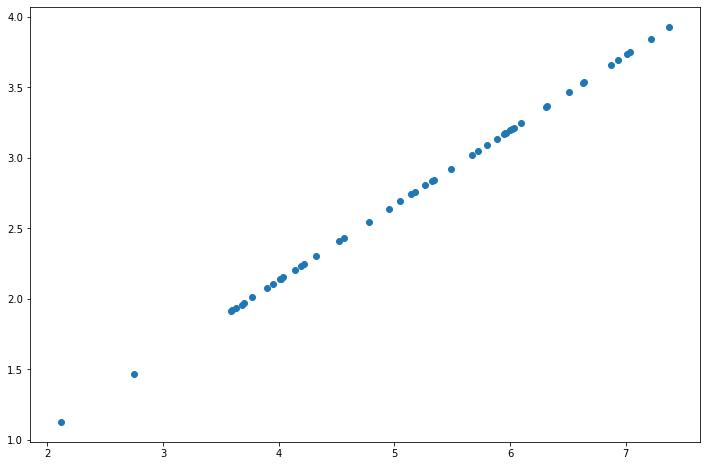

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(np.array(X_approx[:, 0]), np.array(X_approx[:, 1]))
plt.show()

# face image data

In [57]:
mat = sio.loadmat('data/ex7faces.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 23:46:35 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ -37.86631387,  -45.86631387,  -53.86631387, ..., -110.86631387,
         -111.86631387,  -99.86631387],
        [   8.13368613,   -0.86631387,   -8.86631387, ...,  -34.86631387,
           -8.86631387,    0.13368613],
        [ -32.86631387,  -34.86631387,  -36.86631387, ..., -110.86631387,
         -111.86631387, -111.86631387],
        ...,
        [ -46.86631387,  -24.86631387,   -8.86631387, ...,   90.13368613,
           80.13368613,   59.13368613],
        [  19.13368613,   16.13368613,   14.13368613, ...,  -38.86631387,
          -41.86631387,  -46.86631387],
        [-108.86631387, -106.86631387, -102.86631387, ...,   17.13368613,
           17.13368613,   18.13368613]])}

In [60]:
faces = np.matrix(mat['X'])
faces.shape

(5000, 1024)

In [83]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

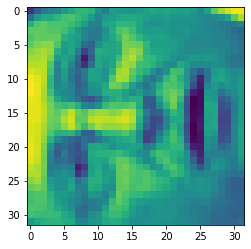

In [67]:

face = np.reshape(faces[3, :], (32, 32))
plt.imshow(face)
plt.show()

In [74]:
U, S, V = pca(faces)
Z = projectData(faces, U, 100)


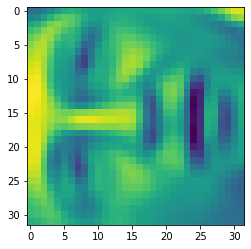

In [76]:
X_recoverd = reconstruction(U, Z)
face = np.reshape(X_recoverd[3, :], (32, 32))
plt.imshow(face)
plt.show()

In [81]:
from sklearn.decomposition import PCA

sk_pca = PCA(n_components=100)
Z = sk_pca.fit_transform(faces)
Z.shape

(5000, 100)

<function matplotlib.pyplot.show(close=None, block=None)>

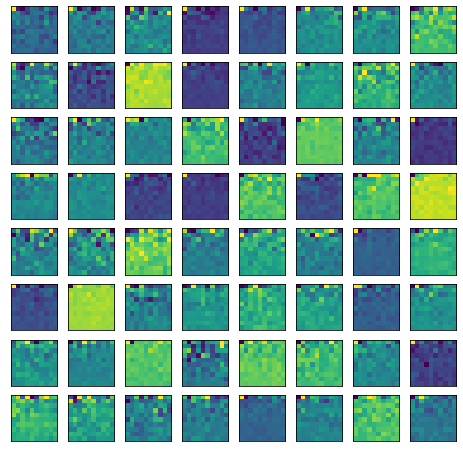

In [84]:
plot_n_image(Z, 64)
plt.show

In [85]:
X_recoverd = sk_pca.inverse_transform(Z)
X_recoverd.shape

(5000, 1024)

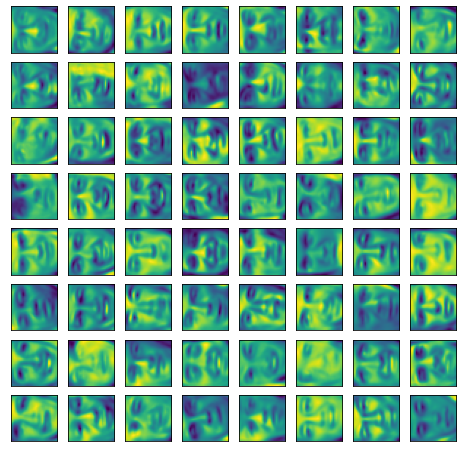

In [86]:
plot_n_image(X_recoverd, n=64)